# 12-Day Program Coding

In [2]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from validate_email import validate_email
%matplotlib inline

In [10]:
#Loading the dataset
df=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')

#Set max of 30 for columns to be shown 
pd.set_option('display.max_columns', 30)
df.head(5)


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,Company Type,Current fulltime,Job created,Job retain,Effective Date,Total Savings,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,LMEP,NaN,NaN,NaN,03/04/2005,0.00,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,LMEP,NaN,NaN,NaN,04/02/2008,136578.20,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,LMEP,1238.0,NaN,NaN,01/05/2015,302959.40,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,ECSP,25.0,NaN,NaN,02/03/2020,2159.67,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,LMEP,2699.0,NaN,NaN,06/30/2017,922407.32,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


##### Day 4

##### Part 1

1- How many different companies are represented in the data set? 

In [24]:
unique_co=df['Company Name'].nunique()
print(f'There are {unique_co} different companies in the data set.')

There are 439 different companies in the data set.


##### Part 2

2- What is the total number of jobs created for businesses in Queens?

In [23]:
city_grp=df.groupby(['City'])
no_job_queens=city_grp.get_group('Queens')['Job created'].sum()
print(f'a total of {no_job_queens} jobs created for businesses in Queens.')

a total of 90.0 jobs created for businesses in Queens.


##### Part 3

3- How many different unique email domains names are there in the data set? 


In [58]:
mod_email = []
for email in df['company email'].dropna():
    if not validate_email(email): # removing invalid email addresses
        continue
    mod_email.append(email)

uniq_email=len(set(mod_email))
print(f'There are {uniq_email} different unique email domains names are there in the data set')

There are 413 different unique email domains names are there in the data set


In [29]:
domain = []
for email in df['company email'].dropna():
    if len(email.split('@')) == 1: # removing invalid email addresses
        continue
    domain.append(email.split('@')[1].lower())


print('Number of unique email domains:', len(set(domain)))

Number of unique email domains: 356


##### Part 4

4- Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

In [60]:
# First check to see if there is any NA in NTA column
df['NTA'].isnull().sum()

41

In [61]:
#Second doping row where NTA is NA
df=df.dropna(axis='index',subset=['NTA'])

In [62]:
# Check again
df['NTA'].isna().sum()

0

Separate different NTA in companies

In [64]:
df['NTA_mod']=df['NTA'].str.split('-')
df=df.explode('NTA_mod').reset_index(drop=True)

<ipython-input-64-2f39a8cf98b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NTA_mod']=df['NTA'].str.split('-')


In [66]:
# get those with only 5 businesses
df_ge_5 = df.groupby('NTA_mod').filter(lambda x: len(x) >= 5)
aggn = {
    'Average Total Savings': ('Total Savings', 'mean'),
    'Total Jobs Created': ('Job created','sum'),
}
Solved=df_ge_5.groupby('NTA_mod').agg(**aggn).reset_index()


Solved

,NTA_mod,Average Total Savings,Total Jobs Created
0,Battery Park City,469890.796667,0.0
1,Boerum Hill,59950.340000,0.0
2,Brooklyn,14327.419333,0.0
3,Brookville,17757.662000,0.0
4,Bushwick South,26140.455000,10.0
5,Carroll Gardens,24337.390000,0.0
6,Civic Center,37214.024000,0.0
7,College Point,17159.372857,2.0
8,Columbia Street,24337.390000,0.0
9,Crown Heights North,4036.298889,0.0


##### Part 5

5- Save your result for the previous question as a CSV file.

In [67]:
Solved.to_csv('12Days_Day4.csv',header=True)

## Day 5

##### Part 1

1- scatter plot of jobs created versus average savings. Use both a - standard and a logarithmic scale for the average savings.

Standard Scale

Text(0.5, 0, 'Number of Job Created')

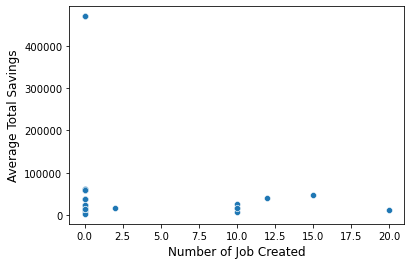

In [68]:
y1=Solved['Average Total Savings']
x1=Solved['Total Jobs Created']


b=sns.scatterplot(data=Solved, x=x1, y=y1)

b.set_ylabel("Average Total Savings", fontsize = 12)
b.set_xlabel("Number of Job Created", fontsize = 12)


Logarithmc Scale

Text(0, 0.5, 'Number of Job Created')

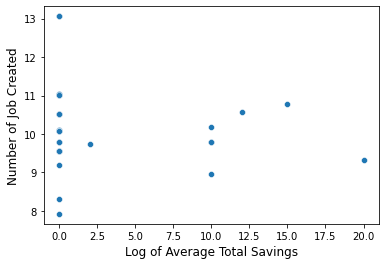

In [69]:
y=np.log(Solved['Average Total Savings'])
x=Solved['Total Jobs Created']

a=sns.scatterplot(data=Solved, x=x, y=y)

a.set_xlabel("Log of Average Total Savings", fontsize = 12)
a.set_ylabel("Number of Job Created", fontsize = 12)



##### Part 2

histogram of the log of the average total savings.

<AxesSubplot:xlabel='Average Total Savings', ylabel='Count'>

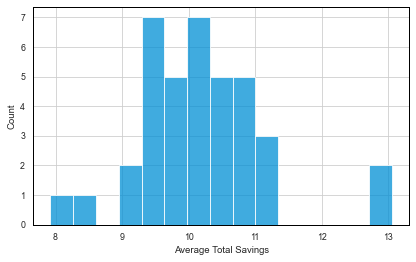

In [308]:
plt.figure(figsize=(6,4))
sns.set_style("whitegrid", {'axes.linewidth': 2, 'axes.edgecolor':'black'})

sns.set_context("paper")
sns.histplot(x,kde=False,bins=15)

##### Part 3

#### line plot of the total jobs created for each month.

In [71]:
#Change time to standard format while reading data
d_parser=lambda x:pd.datetime.strptime(x,'%m/%d/%Y')
df_timewise=pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv', parse_dates=['Effective Date'],date_parser=d_parser )

<ipython-input-71-62f48bcf3ed2>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser=lambda x:pd.datetime.strptime(x,'%m/%d/%Y')


In [257]:
df['Date']=pd.to_datetime(df['Effective Date'], format='%m/%d/%Y')

In [72]:
df_timewise['Month Created']=df_timewise['Effective Date'].dt.month

In [74]:

agg={'tot Job':('Job created', 'sum')}
df_job_basedmonth=df_timewise.groupby('Month Created').agg(**agg).reset_index()

Text(0, 0.5, 'Total Number of Job Created')

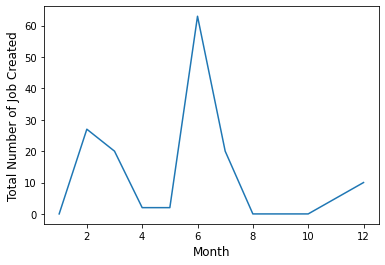

In [76]:
line_X=df_job_basedmonth['Month Created']
line_y=df_job_basedmonth['tot Job']

p=sns.lineplot(x=line_X,y=line_y)
p.set_xlabel("Month", fontsize = 12)
p.set_ylabel("Total Number of Job Created", fontsize = 12)